In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#interactive plotting in separate window

data = pd.read_csv("data/final_video_data_normalized.csv")
correlation_matrix = data.corr()
correlation_matrix['trending']
del data['title']
del data['view_count']
data[["contains_question_mark", "contains_exclamation_mark", "trending", "has_full_cap_word"]] *= 1




view_count                   0.298590
percent_capital             -0.056741
title_length                 0.172063
contains_question_mark       0.032267
contains_exclamation_mark    0.131960
VADER                       -0.012762
has_full_cap_word           -0.227707
full_cap_count              -0.127986
trending                     1.000000
Name: trending, dtype: float64

In [4]:
#target variable
Y = data['trending']

#features
X = data.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
X_train.shape
X_test.shape

(4193, 7)

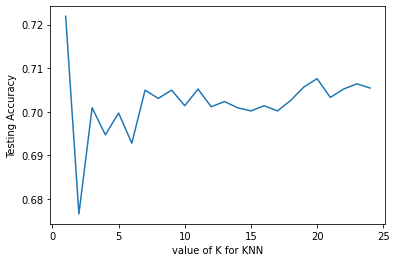

In [7]:
k_range = range(1, 25)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(scores[k])
plt.ion()
plt.plot(k_range, scores_list)
plt.xlabel('value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()